<a href="https://colab.research.google.com/github/m-agnet/Bachelor-of-Physics/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#データを横軸: 時間, 縦軸: 物理量で描画

In [1463]:
# ライブラリのインポート
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [1464]:
# ファイルを読み込む
path = '/content/drive/MyDrive/Colab Notebooks/data_analysis/gas.txt'
data = pd.read_table(path, sep='\s+')
quantity_name = 'TotEng'

# 設定の入力
thermo = 100
t_step = 0.005
skip = t_step * thermo # 1行ごとにskipだけtimeを進めるデータを使っている


# データを出力する
print(data)


          Step    Time      Temp     TotEng     Press
0            0     0.0  1.000000  3070.5000  0.009995
1          100     0.5  1.000000  3070.5000  0.009995
2          200     1.0  1.001939  3068.1408  0.009937
3          300     1.5  1.019325  3055.1215  0.010213
4          400     2.0  1.007991  2997.6305  0.009828
...        ...     ...       ...        ...       ...
9996    999600  4998.0  1.036582  2999.7105  0.009913
9997    999700  4998.5  1.016027  2928.0568  0.009797
9998    999800  4999.0  0.986716  2855.9147  0.009406
9999    999900  4999.5  0.979207  2834.9018  0.009200
10000  1000000  5000.0  0.984676  2846.8870  0.009443

[10001 rows x 5 columns]


In [1465]:
# # データを短くしたいときには実行する
# sidx=1000 + 1
# eidx=10000 + 1
# data = data.drop(range(sidx,eidx))
# print(data)

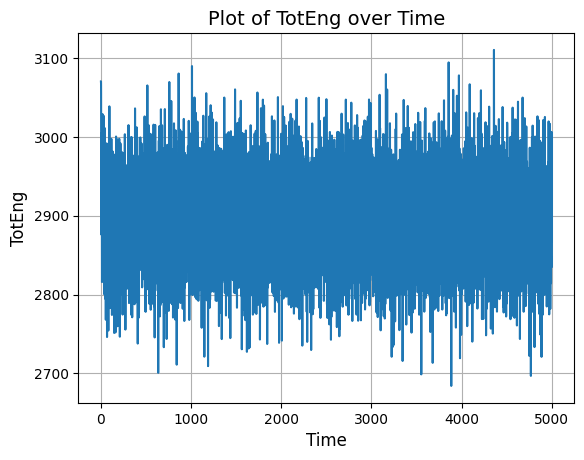

In [1466]:
# データを格納する
x = data['Time']  # 時間
y = data[quantity_name]  # 物理量

# データをプロットする
plt.plot(x, y)
plt.xlabel('Time', fontsize=12)
plt.ylabel(quantity_name, fontsize=12)
plt.title(f'Plot of {quantity_name} over Time', fontsize=14)
plt.grid()

plt.show()


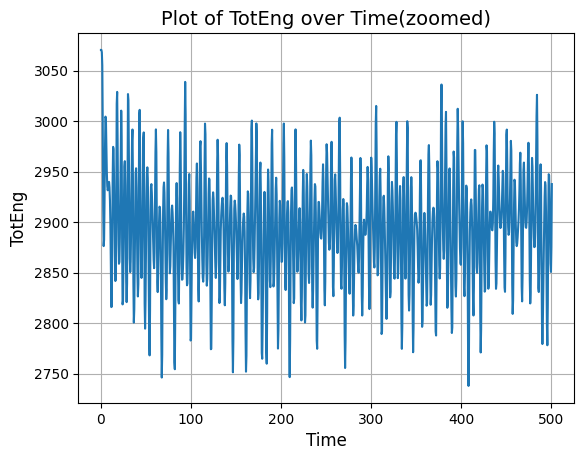

In [1467]:
# ズーム
zoom = m.ceil(501//skip)
x_zoomed = x[:zoom]  # 横軸の範囲を制限
y_zoomed = y[:zoom]  # 対応するy_logの範囲も制限

plt.plot(x_zoomed, y_zoomed)
plt.xlabel('Time', fontsize=12)
plt.ylabel(quantity_name, fontsize=12)
plt.title(f'Plot of {quantity_name} over Time(zoomed)', fontsize=14)
plt.grid()
plt.show()


## 初期値を捨てる

          Step    Time      Temp     TotEng     Press
2          200     1.0  1.001939  3068.1408  0.009937
3          300     1.5  1.019325  3055.1215  0.010213
4          400     2.0  1.007991  2997.6305  0.009828
5          500     2.5  0.984676  2913.2589  0.009556
6          600     3.0  0.974916  2876.2558  0.009492
...        ...     ...       ...        ...       ...
9996    999600  4998.0  1.036582  2999.7105  0.009913
9997    999700  4998.5  1.016027  2928.0568  0.009797
9998    999800  4999.0  0.986716  2855.9147  0.009406
9999    999900  4999.5  0.979207  2834.9018  0.009200
10000  1000000  5000.0  0.984676  2846.8870  0.009443

[9999 rows x 5 columns]


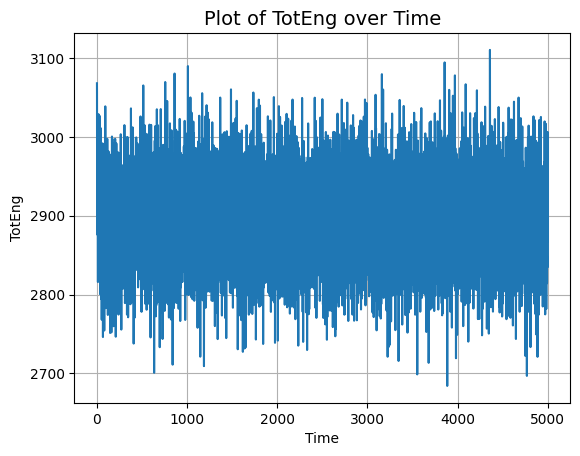

In [1468]:
# データ加工
start = 0
end = 1
data = data.drop(range(start,end+1))
print(data)

# データを再格納する
x = data['Time']  # 時間
y = data[quantity_name]  # 物理量

# データをプロットする
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel(quantity_name)
plt.title('Plot of ' + quantity_name + ' over Time', fontsize=14)
plt.grid()

plt.show()

# 緩和時間に関して(thermo>=10000では実行しない)

## log変換(推定平均値使用)

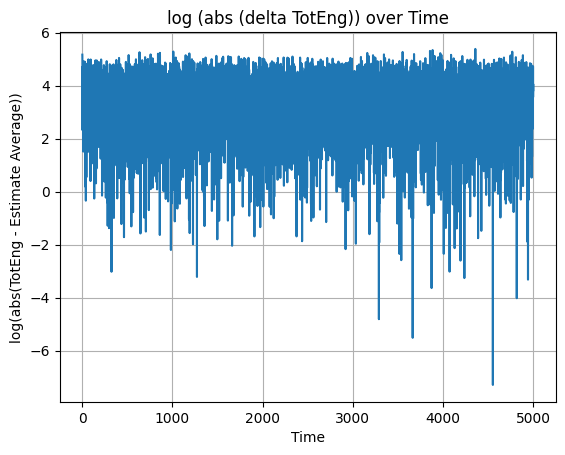

In [1469]:
# log変換
estimate_average = 2892.76668 # 推定平均値を入力, データによって調整
y_log = np.log(np.abs(y - estimate_average))

plt.plot(x, y_log)
plt.xlabel('Time')
plt.ylabel('log(abs(' + quantity_name + ' - Estimate Average))')
plt.title(f'log (abs (delta {quantity_name})) over Time')
plt.grid()
plt.show()


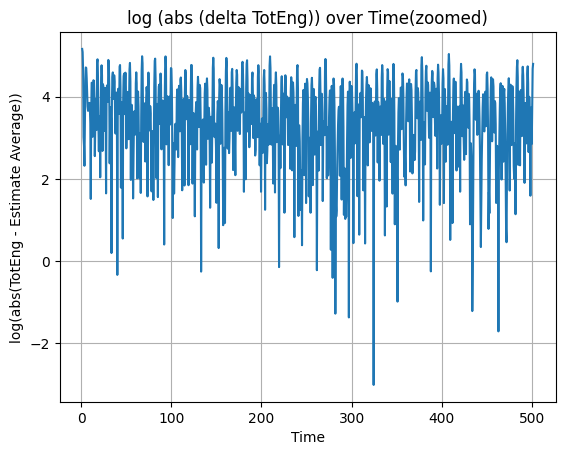

In [1470]:
# ズーム
zoom = m.ceil(501 // skip) # データによって調整
x_zoomed = x[:zoom]  # 横軸の範囲を制限
y_log_zoomed = y_log[:zoom]  # 対応するy_logの範囲も制限

plt.plot(x_zoomed, y_log_zoomed)
plt.xlabel('Time')
plt.ylabel('log(abs(' + quantity_name + ' - Estimate Average))')
plt.title(f'log (abs (delta {quantity_name})) over Time(zoomed)')
plt.grid()
plt.show()


In [1471]:
# # log変換
# estimate_average = 2900 # 推定平均値を入力
# y_log = np.log(np.abs(y - estimate_average))

# fig, ax = plt.subplots()

# ax.plot(x, y_log)
# ax.set_xlabel('Time')
# ax.set_ylabel(f'log(abs( {quantity_name} - Estimate Average))')
# ax.set_title(f'Time Evolution of {quantity_name} after Log Transformation')
# ax.legend()

# # step4 zoomしたグラフの描画
# axins = ax.inset_axes([0.6, 0.6, 0.37, 0.37])
# axins.plot(x, y_log)
# # zoomしたグラフの設定
# x1, x2, y1, y2 = 0, 1000, -4, 5
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# ax.indicate_inset_zoom(axins)

# plt.grid()
# plt.show()


## 線形近似によって緩和時間の測定

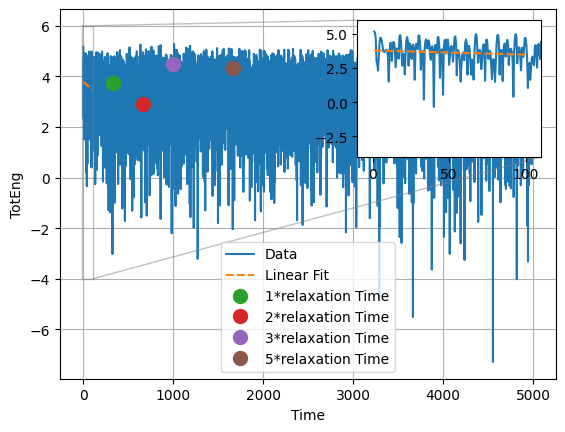

1倍緩和時間 = 331.94929765447927
2倍緩和時間 = 663.8985953089585
3倍緩和時間 = 995.8478929634377
5倍緩和時間 = 1659.7464882723964


In [1472]:
tau = 0.0
if thermo < 10000:

    # 指定のx軸の範囲にあるデータだけを使ってフィットする

    xmin = 0  # 最小のx軸の値
    xmax = 100  # 最大のx軸の値, データによって調整

    mask = (x >= xmin) & (x <= xmax)
    p = np.polyfit(x[mask], y_log[mask], 1)
    y_fit = np.polyval(p, x[mask])

    # フィット直線の傾きから緩和時間を計算する
    tau = -1/p[0]
    times = [1, 2, 3, 5]
    y_vals = [np.interp(tau * t, x, y_log) for t in times]

    # プロット
    fig, ax = plt.subplots()
    ax.plot(x, y_log, label='Data')
    ax.plot(x[mask], y_fit, '--', label='Linear Fit')
    for t, y in zip(times, y_vals):
        ax.plot(tau*t, y, 'o', markersize=10, label=f'{t}*relaxation Time')
    ax.set_xlabel('Time')
    ax.set_ylabel(quantity_name)
    ax.legend()


    # zoomしたグラフの描画
    axins = ax.inset_axes([0.6, 0.6, 0.37, 0.37])
    axins.plot(x, y_log)
    axins.plot(x[mask], y_fit, '--')
    # zoomしたグラフの設定
    x1, x2, y1, y2 = xmin-10, xmax+10, -4, 6
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    ax.indicate_inset_zoom(axins)

    plt.grid()
    plt.show()

    # 結果の出力
    for t, y in zip(times, y_vals):
        print(f'{t}倍緩和時間 =', t*tau)


## 5倍緩和時間以前を捨てる データ加工

          Step    Time      Temp     TotEng     Press
3320    332000  1660.0  1.043908  3014.8765  0.010047
3321    332100  1660.5  1.044395  3005.3362  0.009788
3322    332200  1661.0  1.017033  2946.2677  0.009837
3323    332300  1661.5  1.001614  2892.6372  0.009404
3324    332400  1662.0  0.993025  2863.4505  0.009563
...        ...     ...       ...        ...       ...
9996    999600  4998.0  1.036582  2999.7105  0.009913
9997    999700  4998.5  1.016027  2928.0568  0.009797
9998    999800  4999.0  0.986716  2855.9147  0.009406
9999    999900  4999.5  0.979207  2834.9018  0.009200
10000  1000000  5000.0  0.984676  2846.8870  0.009443

[6681 rows x 5 columns]


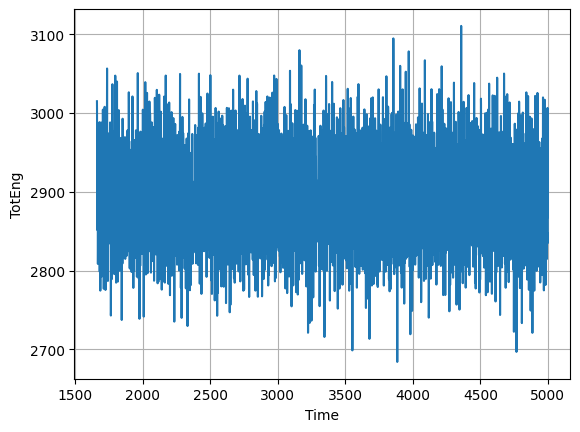

In [1473]:
if thermo < 10000:

    # 再度ファイルを読み込む
    data = pd.read_table(path, sep='\s+')



    # データ加工
    t=5 # t倍の緩和時間を使用
    trimm = t*tau // skip # 切り捨てるデータの最終行を決定

    start = 0
    end = m.ceil(trimm)
    data = data.drop(range(start,end+1))

    # データの出力
    print(data)

    # データを再格納する
    x = data['Time']  # 時間
    y = data[quantity_name]  # 物理量

    # データをプロットする
    plt.plot(x, y)
    plt.xlabel('Time')
    plt.ylabel(quantity_name)
    plt.grid()
    plt.show()


# 物理量の確率密度分布

Mean: 2892.84026
Median: 2892.39030
Standard deviation: 56.80386
Minimum value: 2684.06820
Maximum value: 3110.43630
Interquartile range: 76.92350


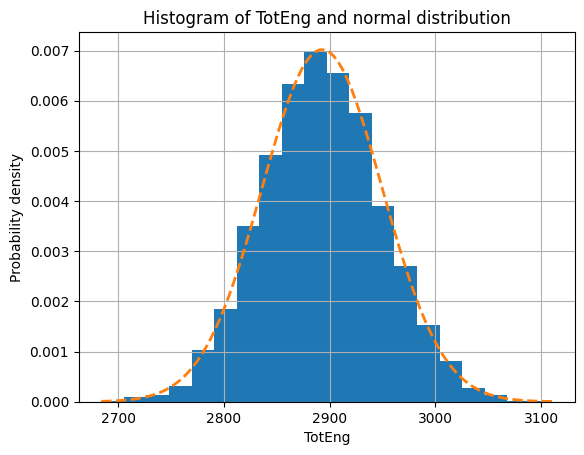

In [1474]:
# データ生成
quantity = data[quantity_name] # t倍の緩和時間以前を捨てた物理量データ

# 統計情報の表示
print(f"Mean: {np.mean(quantity):.5f}")
print(f"Median: {np.median(quantity):.5f}")
print(f"Standard deviation: {np.std(quantity):.5f}")
print(f"Minimum value: {np.min(quantity):.5f}")
print(f"Maximum value: {np.max(quantity):.5f}")
q1, q3 = np.percentile(quantity, [25, 75])
print(f"Interquartile range: {q3 - q1:.5f}")

# ヒストグラムの作成
n, bins, patches = plt.hist(quantity, bins=20, density=True)

# 平均値と標準偏差を求める
mu, sigma = quantity.mean(), quantity.std()

# 正規分布の確率密度関数を作成
x = np.linspace(quantity.min(), quantity.max(), 100)
y = norm.pdf(x, mu, sigma)

# 正規分布の確率密度関数をプロット
plt.plot(x, y, '--', linewidth=2, label='Normal Distribution')


# 軸ラベルの設定
plt.xlabel(quantity_name)
plt.ylabel('Probability density')

# グラフのタイトルの設定
plt.title('Histogram of ' + quantity_name + ' and normal distribution')

# グリッド線の表示
plt.grid()

# グラフを表示
plt.show()


# 大数の法則, 中心極限定理の確認

## ある程度で区切り, それぞれの平均値を用いてヒストグラムを作成

In [1475]:
# データの確認
print(data)

          Step    Time      Temp     TotEng     Press
3320    332000  1660.0  1.043908  3014.8765  0.010047
3321    332100  1660.5  1.044395  3005.3362  0.009788
3322    332200  1661.0  1.017033  2946.2677  0.009837
3323    332300  1661.5  1.001614  2892.6372  0.009404
3324    332400  1662.0  0.993025  2863.4505  0.009563
...        ...     ...       ...        ...       ...
9996    999600  4998.0  1.036582  2999.7105  0.009913
9997    999700  4998.5  1.016027  2928.0568  0.009797
9998    999800  4999.0  0.986716  2855.9147  0.009406
9999    999900  4999.5  0.979207  2834.9018  0.009200
10000  1000000  5000.0  0.984676  2846.8870  0.009443

[6681 rows x 5 columns]


In [1476]:
# データのシャッフル, thermoが10,000より大きいならばコメントアウト..
if thermo < 10000:
    data = data.sample(frac=1)
    print(data)

        Step    Time      Temp     TotEng     Press
9962  996200  4981.0  1.013086  2931.1144  0.009746
7019  701900  3509.5  0.999444  2893.3822  0.009503
5314  531400  2657.0  0.993170  2877.5289  0.009553
6291  629100  3145.5  1.013438  2939.6584  0.009943
9021  902100  4510.5  0.970177  2821.9323  0.009354
...      ...     ...       ...        ...       ...
5952  595200  2976.0  1.010275  2929.2290  0.009841
9672  967200  4836.0  1.026383  2974.1076  0.009864
8421  842100  4210.5  1.000287  2902.2934  0.009578
5927  592700  2963.5  1.014937  2939.6527  0.009988
7821  782100  3910.5  1.022002  2977.2146  0.009829

[6681 rows x 5 columns]


Statistics for split=1
Mean: 2892.84026
Median: 2892.39030
Standard deviation: 56.80811
Minimum value: 2684.06820
Maximum value: 3110.43630
Interquartile range: 76.92350

Statistics for split=4
Mean: 2892.82763
Median: 2892.04606
Standard deviation: 28.91595
Minimum value: 2807.05025
Maximum value: 2993.45527
Interquartile range: 38.80689

Statistics for split=16
Mean: 2892.79525
Median: 2892.60109
Standard deviation: 15.21088
Minimum value: 2853.02821
Maximum value: 2938.17073
Interquartile range: 20.72936

Statistics for split=64
Mean: 2892.79368
Median: 2892.65699
Standard deviation: 7.68409
Minimum value: 2875.47980
Maximum value: 2910.14993
Interquartile range: 9.79863



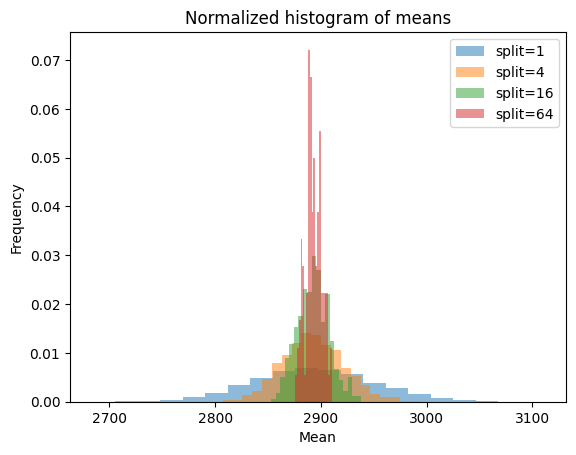

In [1477]:
# データ整理
quantity = data[quantity_name]
num_rows = quantity.shape[0]

# 任意のsplit値のリスト
split_list = [1, 4, 16, 64]

for split in split_list:
    # ヒストグラムの描画
    num_splits = num_rows // split
    means = quantity.iloc[:num_splits*split].to_numpy().reshape(-1, split).mean(axis=1)
    plt.hist(means, bins=20, alpha=0.5, label=f"split={split}", density=True)

    # 統計情報
    mean = np.mean(means)
    median = np.median(means)
    std_dev = np.std(means, ddof=1)
    min_val = np.min(means)
    max_val = np.max(means)
    q1, q3 = np.percentile(means, [25, 75])

    print(f"Statistics for split={split}")
    print(f"Mean: {mean:.5f}")
    print(f"Median: {median:.5f}")
    print(f"Standard deviation: {std_dev:.5f}")
    print(f"Minimum value: {min_val:.5f}")
    print(f"Maximum value: {max_val:.5f}")
    print(f"Interquartile range: {q3-q1:.5f}")
    print()

# ヒストグラムの装飾
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Normalized histogram of means')
plt.legend()

plt.show()


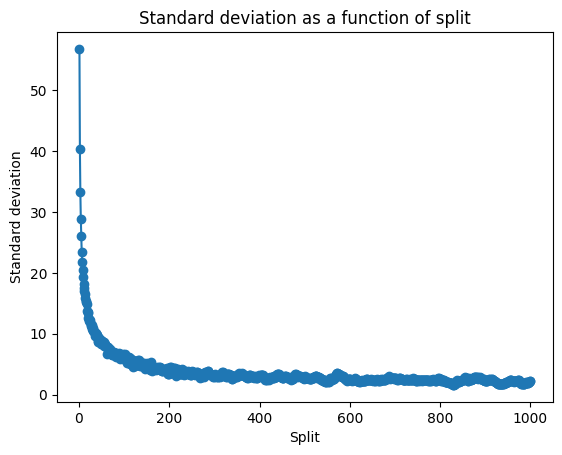

In [1478]:
# splitによる標準偏差の推移
std_dev_list = []

start = 1
end = 1000 # データによって調整

for split in range(start, end+1):
    # データをsplit数に分割し、各グループの平均値を計算
    num_splits = num_rows // split
    means = quantity.iloc[:num_splits*split].to_numpy().reshape(-1, split).mean(axis=1)

    # 平均値の標準偏差を計算し、リストに追加
    std_dev = np.std(means, ddof=1)
    std_dev_list.append(std_dev)

# 横軸にsplit数、縦軸に標準偏差を取るプロットを作成
plt.plot(range(start, end+1), std_dev_list, 'o-')
plt.xlabel('Split')
plt.ylabel('Standard deviation')
plt.title('Standard deviation as a function of split')

plt.show()


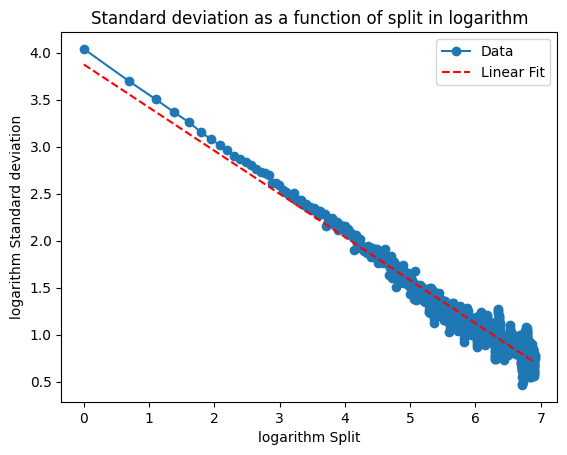

gradient=-0.45911371640037124


In [1479]:
# 対数変換
x = np.log(range(start, end+1))
y = np.log(std_dev_list)
fit = np.polyfit(x, y, deg=1)  # 1次の多項式による線形フィット

# プロット
plt.plot(x, y, 'o-')
plt.plot(x, fit[0] * x + fit[1], color='red', linestyle='--')  # 線形フィットのプロット
plt.xlabel('logarithm Split')
plt.ylabel('logarithm Standard deviation')
plt.title('Standard deviation as a function of split in logarithm')
plt.legend(['Data', 'Linear Fit'])
plt.show()
print(f"gradient={fit[0]}")


In [1480]:
# quantityの順番を元に戻す

if thermo < 10000:
    print(quantity)
    print() # 1行開ける
    data=data.sort_index()
    quantity=data[quantity_name]
    print(quantity)

9962    2931.1144
7019    2893.3822
5314    2877.5289
6291    2939.6584
9021    2821.9323
          ...    
5952    2929.2290
9672    2974.1076
8421    2902.2934
5927    2939.6527
7821    2977.2146
Name: TotEng, Length: 6681, dtype: float64

3320     3014.8765
3321     3005.3362
3322     2946.2677
3323     2892.6372
3324     2863.4505
           ...    
9996     2999.7105
9997     2928.0568
9998     2855.9147
9999     2834.9018
10000    2846.8870
Name: TotEng, Length: 6681, dtype: float64
